# DS 3000 - Assignment 4

**Student Name**: Erika Sohn

**Date**: May 27, 2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

##Predicting Passenger Counts (50 pts)
### Instructions
San Francisco International Airport publishes data on monthly passenger traffic statistics for each airline from 1999 to 2023. This dataset is used to understand air travel trends, particularly with international travelers, because tourism contributes significantly to the San Francisco economy. The purpose of this assignment is to understand **patterns and trends in the passenger traffic and create a statistical model to make predictions.**

Data source: Air_Traffic_Passenger_Statistics.csv

Note: Pay close attention to the questions because you will need to aggregate the passenger counts when you are required to report the passenger traffic, the number of passengers who enplaned/deplaned annually, etc.

Write python code to answer the questions below and ensure that you round all numeric calculations to 2 decimal places.

### 1. Load and Inspect Data (3 pts)
Load data into a df. Inspect the data and perform **at least** one type of data preparation

In [88]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
filename = '/content/drive/MyDrive/Air_Traffic_Passenger_Statistics.csv'
df = pd.read_csv(filename)
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [90]:
# Inspect data: 1) shape 2) NaNs 3) dtypes
print(df.shape)
print(df.isnull().sum()) # NaNs for 'Operating Airline IATA' and 'Published Airline IATA'
print(df.dtypes)

(35172, 15)
Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64
Activity Period                 int64
Activity Period Start Date     object
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  o

In [91]:
# Drop duplicates and fill NaNs with placeholder
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned['Operating Airline IATA Code'].fillna('Unknown', inplace=True)
df['Published Airline IATA Code'].fillna('Unknown', inplace=True)

# Change to appropriate datatypes
cat_cols = [
    'Operating Airline', 'Operating Airline IATA Code',
    'Published Airline', 'Published Airline IATA Code',
    'GEO Summary', 'GEO Region', 'Activity Type Code',
    'Price Category Code', 'Terminal', 'Boarding Area'
]

df_cleaned[cat_cols] = df_cleaned[cat_cols].astype('category')
df_cleaned['Activity Period'] = pd.to_datetime(df_cleaned['Activity Period'], format='%Y%m')
df_cleaned['Activity Period Start Date'] = pd.to_datetime(df_cleaned['Activity Period Start Date'])
df_cleaned['data_as_of'] = pd.to_datetime(df_cleaned['data_as_of'])
df_cleaned['data_loaded_at'] = pd.to_datetime(df_cleaned['data_loaded_at'])

<ipython-input-91-9a63e4d36c00>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Operating Airline IATA Code'].fillna('Unknown', inplace=True)
<ipython-input-91-9a63e4d36c00>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [92]:
print(df_cleaned.shape)
print(df_cleaned.isnull().sum()) # NaNs for 'Operating Airline IATA' and 'Published Airline IATA'
print(df_cleaned.dtypes)

(35172, 15)
Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code      0
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64
Activity Period                datetime64[ns]
Activity Period Start Date     datetime64[ns]
Operating Airline                    category
Operating Airline IATA Code          category
Published Airline                    category
Published Airline IATA Code          category
GEO Summary                          category
GEO Region                           category
Activity Type Code                   category
Price Category Code                 

I loaded the dataset into a DataFrame and performed basic inspection using .shape, .isnull().sum(), and .dtypes. I found 316 missing values in two IATA code columns and converted date-related columns from object to datetime format. Additionally, I filled missing IATA codes with the placeholder 'Unknown' to prepare the data for analysis.

### 2. Determine Terminal Most Traffic (5 pts)
Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.

In [93]:
# 2: (5 pts) Determine which terminal has the most passenger traffic and visualize the results

# Group by terminal and sum passenger counts
terminal_traffic = df_cleaned.groupby('Terminal')['Passenger Count'].sum()

# Exclude terminals with 0 total passengers
terminal_traffic = terminal_traffic[terminal_traffic > 0].sort_values(ascending=False)

<ipython-input-93-36a87d36ee22>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terminal_traffic = df_cleaned.groupby('Terminal')['Passenger Count'].sum()


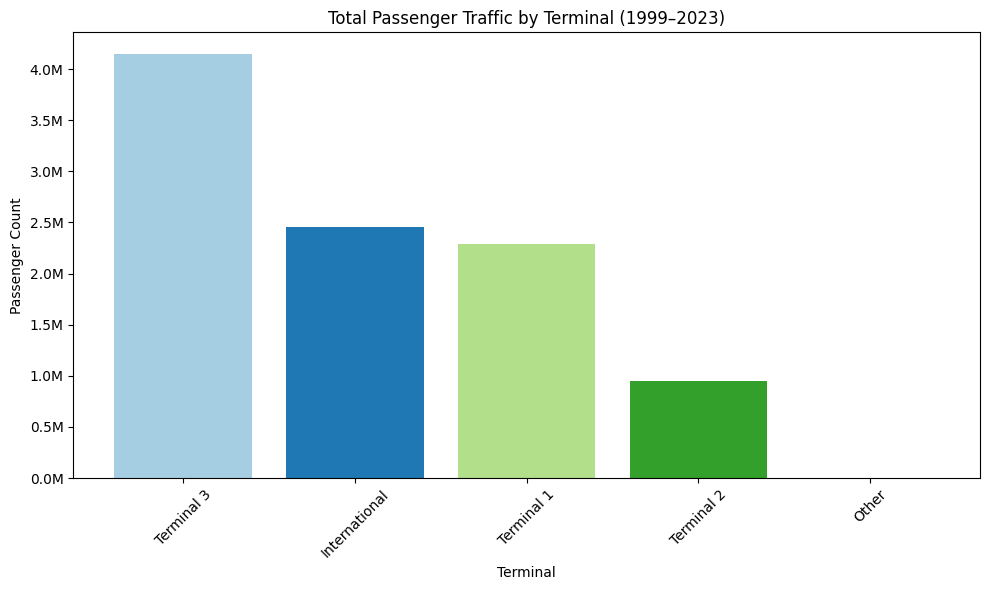

In [94]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = plt.cm.Paired(range(len(terminal_traffic)))

plt.figure(figsize=(10, 6))
plt.bar(terminal_traffic.index, terminal_traffic.values, color=colors)

plt.title('Total Passenger Traffic by Terminal (1999–2023)')
plt.xlabel('Terminal')
plt.ylabel('Passenger Count')

# Format y-axis in hundreds of millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e8:.1f}M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I grouped the data by terminal and summed the passenger counts for each group to determine which terminal had the highest overall traffic. Using a Seaborn bar plot, I visualized the results and found that Terminal 3 had the highest passenger traffic (4.2 x 10⁸), while Terminal 2 had the lowest (1 x 10⁸).

Note that the terminal labeled "Other" appears on the graph with a passenger count close to zero (but not exactly zero, as terminals with zero passengers were already filtered out).

Terminal 3 likely has the highest passenger traffic because it serves as SFO’s primary hub for United Airlines and handles a high volume of domestic flights and transfers. It also operates some of the airport’s most frequent routes, such as SFO to LAX and JFK. In contrast, Terminal 2 sees lower traffic as it houses fewer carriers and serves a smaller number of routes.

### 3. Annual Domestic and International Passenger Trends (10 pts)
Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.

In [95]:
df_cleaned['Activity Period'] = pd.to_datetime(df_cleaned['Activity Period'], format='%Y%m')
df_cleaned['Year'] = df_cleaned['Activity Period'].dt.year

# Strip whitespace from key columns
df_cleaned['Activity Type Code'] = df_cleaned['Activity Type Code'].str.strip()
df_cleaned['GEO Summary'] = df_cleaned['GEO Summary'].str.strip()

# Filter for Enplaned and Deplaned only
df_cleaned = df_cleaned[df_cleaned['Activity Type Code'].isin(['Enplaned', 'Deplaned'])]

# Split into Domestic and International
domestic_df = df_cleaned[df_cleaned['GEO Summary'] == 'Domestic']
international_df = df_cleaned[df_cleaned['GEO Summary'] == 'International']

# Group and sum
domestic_grouped = (
    domestic_df.groupby(['Year', 'Activity Type Code'])['Passenger Count']
    .sum()
    .reset_index()
)

international_grouped = (
    international_df.groupby(['Year', 'Activity Type Code'])['Passenger Count']
    .sum()
    .reset_index()
)

domestic_grouped.head(), international_grouped.head()

(   Year Activity Type Code  Passenger Count
 0  1999           Deplaned          8485199
 1  1999           Enplaned          8545107
 2  2000           Deplaned         16023322
 3  2000           Enplaned         16133466
 4  2001           Deplaned         13146120,
    Year Activity Type Code  Passenger Count
 0  1999           Deplaned          1880883
 1  1999           Enplaned          1895090
 2  2000           Deplaned          4072532
 3  2000           Enplaned          4074559
 4  2001           Deplaned          3752735)

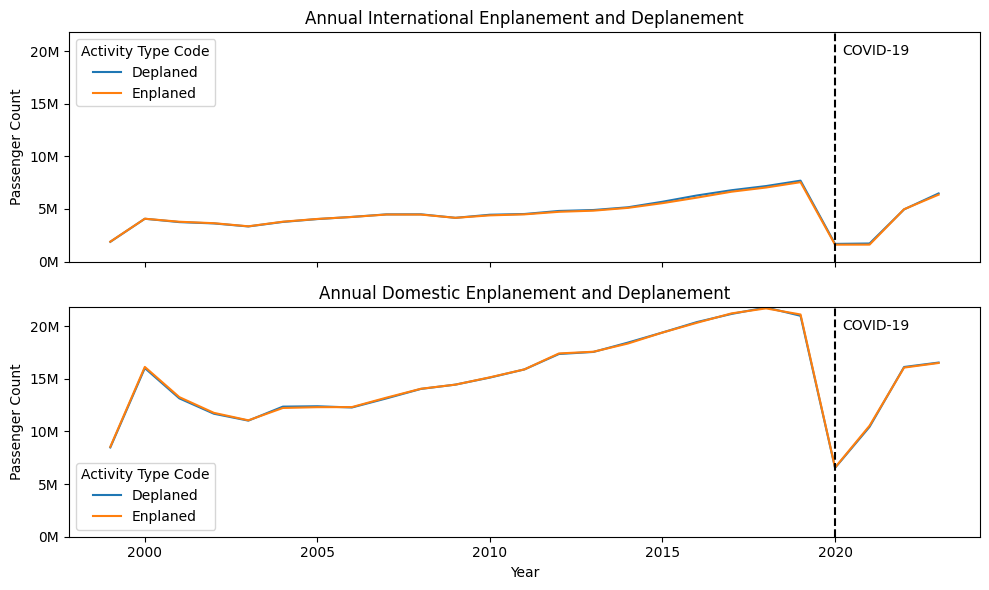

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Find overall max across both datasets to sync y-axes
overall_max = max(
    domestic_grouped['Passenger Count'].max(),
    international_grouped['Passenger Count'].max()
)

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

# 1: International
sns.lineplot(
    data=international_grouped,
    x='Year',
    y='Passenger Count',
    hue='Activity Type Code',
    ax=axs[0]
)
axs[0].set_title('Annual International Enplanement and Deplanement')
axs[0].set_ylabel('Passenger Count')

# 2: Domestic trends
sns.lineplot(
    data=domestic_grouped,
    x='Year',
    y='Passenger Count',
    hue='Activity Type Code',
    ax=axs[1]
)
axs[1].set_title('Annual Domestic Enplanement and Deplanement')
axs[1].set_ylabel('Passenger Count')
axs[1].set_xlabel('Year')

# Standarize y-axis in millions and add COVID-19 marker
# Citation: https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
# Citation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
for ax in axs:
    ax.set_ylim(0, overall_max)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

    # Add COVID-19 marker
    ax.axvline(x=2020, color='black', linestyle='--')
    ax.text(2020 + 0.2, overall_max * 0.9, 'COVID-19', color='black')

plt.tight_layout()
plt.show()

From the graphs above, we observe a sharp decline in both domestic and international enplanement and deplanement in **2020**, marking the lowest annual passenger traffic in the dataset. This significant drop is most likely due to the **COVID-19 pandemic**, during which airline operations were suspended, international borders were closed, and strict social distancing policies were implemented globally.

In contrast, **2019** shows a peak in passenger traffic across both categories, representing pre-pandemic travel activity at its height.

Although both graphs follow similar overall trends, the decline **appears more pronounced in domestic traffic.** This is likely because domestic flights account for the majority of passenger volume at SFO, making their fluctuations more visually significant compared to international travel.

### 4. Airlines Most Traffic 10 Years (10 pts)
 Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.

In [97]:
# Extract 4 digit year from 'Activity Period' and filter for recent 10 years (inclusive)
df_cleaned['Operating Airline'] = df_cleaned['Operating Airline'].str.strip()

latest_year = df_cleaned['Year'].max()
recent_df = df_cleaned[df_cleaned['Year'] >= latest_year - 9]

airline_traffic = (
    recent_df.groupby(['Year', 'Operating Airline'])['Passenger Count']
    .sum()
    .reset_index()
)

top_5 = (
    airline_traffic.groupby('Operating Airline')['Passenger Count']
    .sum()
    .nlargest(5)
    .index.tolist()
)

# Filter only top 5
filtered_top_5 = airline_traffic[airline_traffic['Operating Airline'].isin(top_5)]
filtered_top_5.head()

,Year,Operating Airline,Passenger Count
9,2014,American Airlines,2924657
17,2014,Delta Air Lines,2983189
35,2014,SkyWest Airlines,3699652
36,2014,Southwest Airlines,3268168
42,2014,United Airlines,18015765


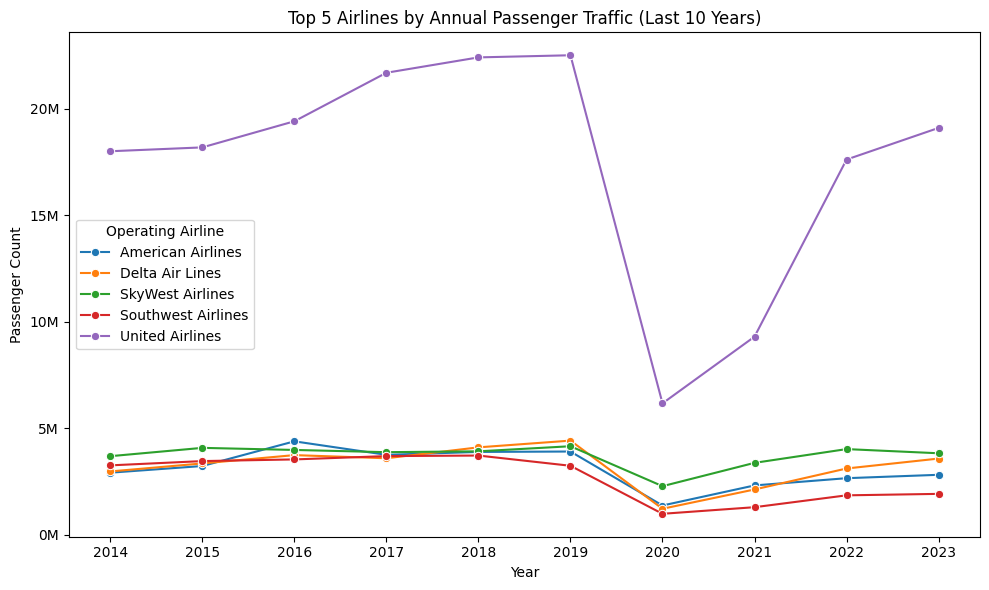

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_top_5,
    x='Year',
    y='Passenger Count',
    hue='Operating Airline',
    marker='o'
)

plt.title('Top 5 Airlines by Annual Passenger Traffic (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.xticks(ticks=filtered_top_5['Year'].unique(), fontweight='normal')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.legend(title='Operating Airline', loc='center left')
plt.tight_layout()
plt.show()

The line chart above shows passenger trends for the top five airlines at SFO over the past ten years. **United Airlines consistently leads by a large margin, peaking at around 23 million passengers in 2019**, just before the COVID-19 pandemic. Although traffic dropped in 2020 across all airlines, United remained dominant and rebounded strongly after 2021.

The other four airlines (American Airlines, Delta Air Lines, SkyWest Airlines, and Southwest Airlines) demonstrate relatively stable trends, with passenger volumes in the **2 to 5 million range**. While these carriers also experienced sharp declines in 2020, they recovered gradually, with no major shifts in rank.

Overall, **there were no significant changes in leadership among the top five airlines during the last decade**. However, the impact of the pandemic is clearly visible, especially in 2020 and 2021. United Airlines’ role as a hub carrier at SFO likely explains its consistently high traffic volumes. This further reinforces our analysis in Q2, which showed that Terminal 3, home to United Airlines, has the highest passenger traffic at the airport.

### 5. Deplaned Passengers in May 2003 - 2018 (7 pts)
Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.

In [99]:
df_cleaned['Year'] = df_cleaned['Activity Period'].dt.year
df_cleaned['Month'] = df_cleaned['Activity Period'].dt.month

# Filter for May (2003–2018) and 'Deplaned' only
may_deplaned = df_cleaned[
    (df_cleaned['Year'] >= 2003) &
    (df_cleaned['Year'] <= 2018) &
    (df_cleaned['Month'] == 5) &
    (df_cleaned['Activity Type Code'].str.strip() == 'Deplaned')
]

# Group by year and convert count to millions
annual_may_deplaned = (
    may_deplaned.groupby('Year')['Passenger Count']
    .sum()
    .reset_index()
)
annual_may_deplaned['Passenger Count'] = annual_may_deplaned['Passenger Count'] / 1e6  # to millions

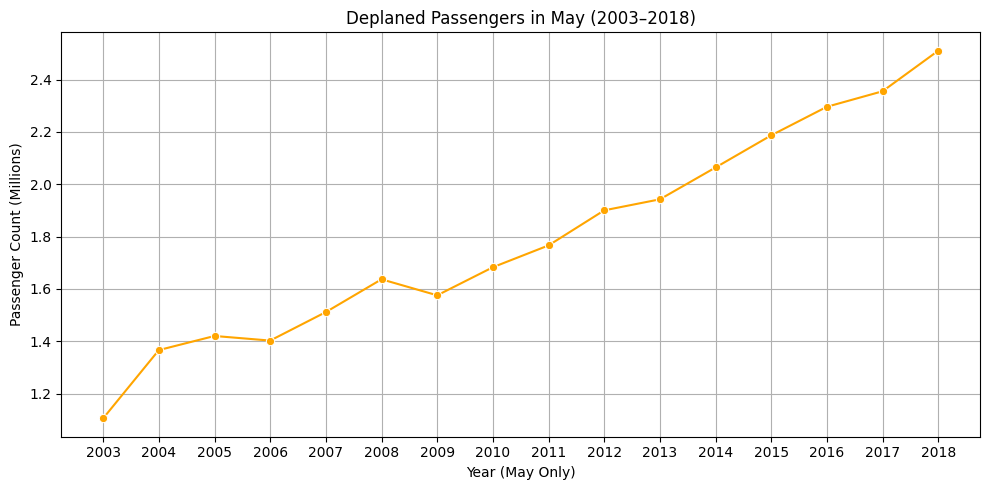

In [100]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_may_deplaned, x='Year', y='Passenger Count', marker='o', color='orange')
plt.title('Deplaned Passengers in May (2003–2018)')
plt.xlabel('Year (May Only)')
plt.ylabel('Passenger Count (Millions)')
plt.xticks(ticks=annual_may_deplaned['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart **shows a clear upward trend** in the number of passengers deplaning at SFO each May from 2003 to 2018. It shows the passenger counts steadily increased from just around 1.1 million in 2003 to nearly 2.5 million in 2018, **more than doubling over the 16 years.**

However, it's important to note the fluctuations around 2006 and 2009. These fluctuations were likely due to the various events during that period such as the **2003 SARS outbreak and 2008 financial crisis.** However, growth became more stable from 2010 onward suggests a strong recovery and increasing demand for air travel into San Francisco during the spring travel season.

### 6. Predict Passenger Count for May 2019 - 2020 (10 pts)
Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.

In [101]:
from sklearn.linear_model import LinearRegression

annual_may_deplaned = (
    may_deplaned.groupby('Year')['Passenger Count']
    .sum()
    .reset_index()
)
annual_may_deplaned['Passenger Count'] = annual_may_deplaned['Passenger Count'] / 1e6

# Train regression model
X = annual_may_deplaned[['Year']]
y = annual_may_deplaned['Passenger Count']
model = LinearRegression().fit(X, y)

# Predict for 2019 and 2020
future_years = pd.DataFrame({'Year': [2019, 2020]})
future_preds = model.predict(future_years)

# Filter --> find actual values --> scale them
actuals = df_cleaned[
    (df_cleaned['Year'].isin([2019, 2020])) &
    (df_cleaned['Month'] == 5) &
    (df_cleaned['Activity Type Code'] == 'Deplaned')
].groupby('Year')['Passenger Count'].sum().reset_index().rename(columns={'Passenger Count': 'Actual'})
actuals['Actual'] = actuals['Actual'] / 1e6

# Merge for comparison
predictions_df = future_years.copy()
predictions_df['Predicted'] = future_preds
predictions_df = predictions_df.merge(actuals, on='Year', how='left')

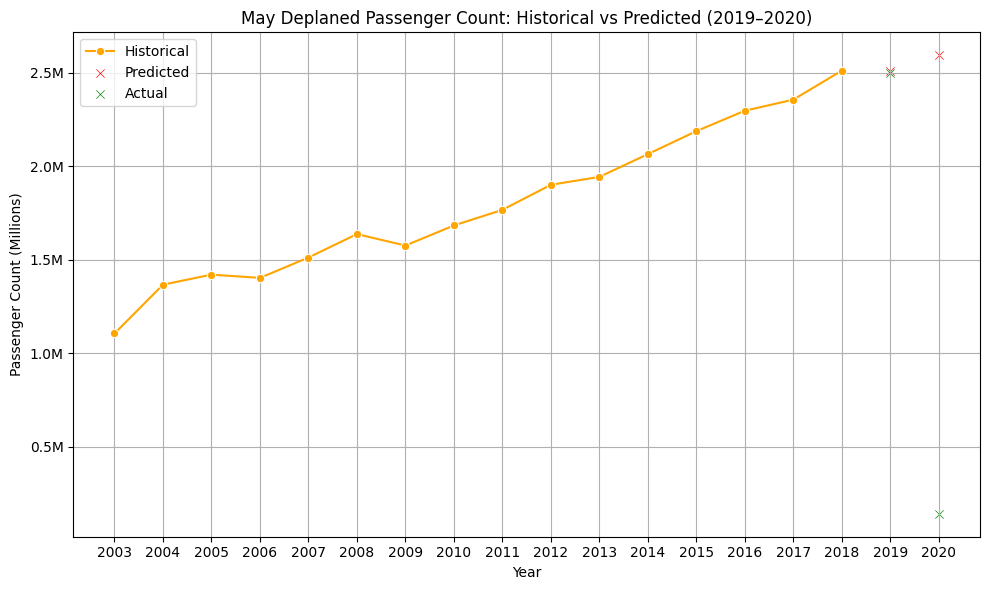

In [102]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_may_deplaned, x='Year', y='Passenger Count', color='orange', marker='o', label='Historical')
sns.scatterplot(data=predictions_df, x='Year', y='Predicted', color='red', marker='x', label='Predicted')
sns.scatterplot(data=predictions_df, x='Year', y='Actual', color='green', marker='x', label='Actual')

plt.title('May Deplaned Passenger Count: Historical vs Predicted (2019–2020)')
plt.xlabel('Year')
plt.ylabel('Passenger Count (Millions)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f}M'))
plt.gca().xaxis.set_major_locator(MultipleLocator(1)) # gets rid of 2010.5, 2011.5, etc. issue
plt.tight_layout()
plt.legend()
plt.show()

The linear regression model above demonstrates a **strong fit** for long-term passenger traffic predictions, assuming stable conditions. However, the large discrepancy between the actual and predicted values in 2020 highlights how external factors (e.g., COVID-19, the Russia-Ukraine war, and travel restrictions) can significantly distort the accuracy of forecasting models.

### 7. Find R-squared
Calculate the R-squared and explain what this tells you about the model.

In [103]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred) # calculated only using data in training set
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9753


The **R-squared value of 0.9753 demonstrates a very strong fit**, indicating that May deplaned passenger counts from 2003 to 2018 follow a highly linear and predictable trend. However, as previously noted, the **actual and predicted values for 2020 diverge significantly** due to the impact of the COVID-19 pandemic. This highlights the influence of external shocks and non-recurring events (similar to what was observed during the 2008 Financial Crisis and the SARS outbreak in earlier years).

Overall, this emphasizes both the strength and limitation of linear regression models: while the model is strong in stable conditions, its accuracy is significantly hindered by contingent variables and disruptions.

### 8.1 Bonus Questions (5 pts)
Residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.

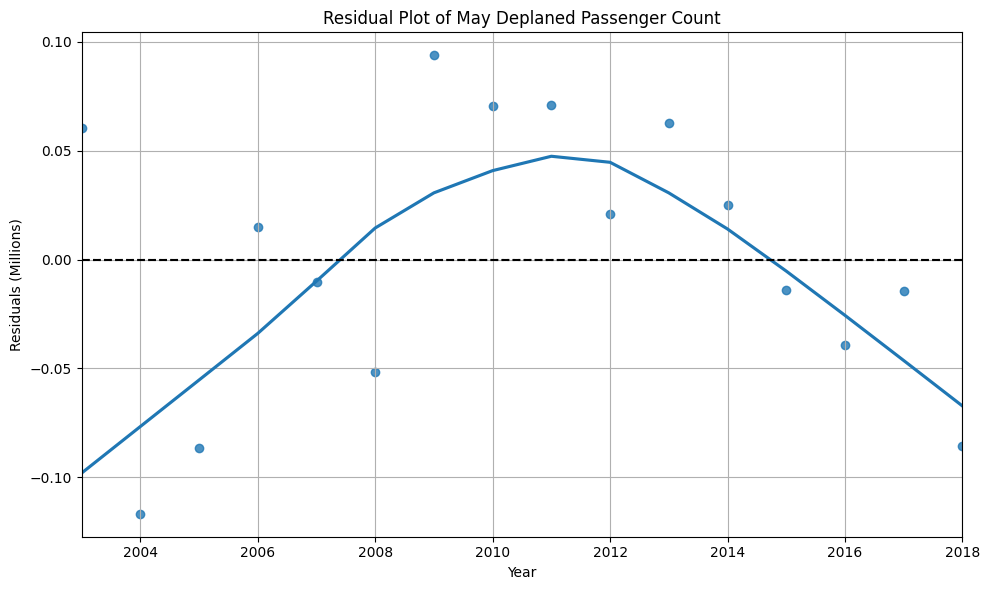

In [104]:
predictions_df['Residual'] = predictions_df['Actual'] - predictions_df['Predicted']

plt.figure(figsize=(10, 6))
sns.residplot(x=annual_may_deplaned['Year'], y=model.predict(X) - y, lowess=True)
plt.title('Residual Plot of May Deplaned Passenger Count')
plt.xlabel('Year')
plt.ylabel('Residuals (Millions)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

The residual plot shows a clear upward-sloping U-shape, indicating a non-random distribution of residuals. This suggests that our linear regression model may be biased and does not meet the assumptions of homoscedasticity (https://condor.depaul.edu/sjost/it223/documents/regress.htm). As a result, the model’s errors are not evenly distributed across time, which could be due to an underlying nonlinear relationship or the influence of the external shocks mentioned previously.

**BONUS:** I'll be conducting an additional test to evaluate whether there is a statistically significant difference in passenger volumes between Low Fare and Other fare categories in the Price Category Code column. First, I will create a box plot with whiskers to visually compare the passenger count distributions across the two fare types. Then, I will perform a two-sample t-test to formally assess the statistical significance of the observed difference. Note, we cannot do a Pearson's correlation test on this set of data because the 'Price Category Code' variable is categorical.

<ipython-input-105-4ec43ff0919f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = corr_df.groupby('Price Category Code')['Passenger Count'].sum().reset_index()


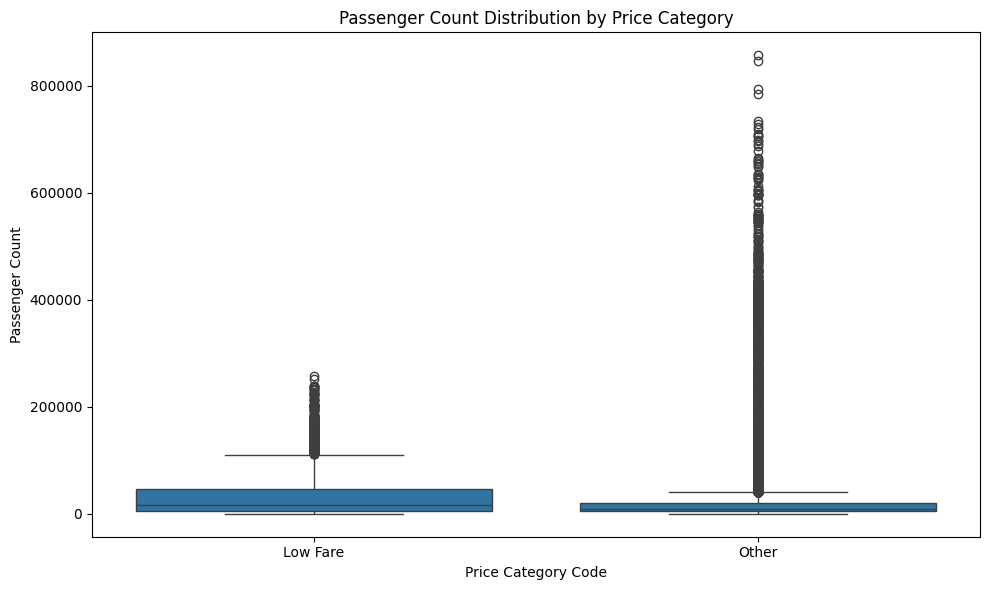

In [105]:
from scipy.stats import ttest_ind

corr_df = df_cleaned[df_cleaned['Price Category Code'].isin(['Low Fare', 'Other'])]
grouped = corr_df.groupby('Price Category Code')['Passenger Count'].sum().reset_index()

# Whisker box plot to show distribution across 2 groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Category Code', y='Passenger Count', data=corr_df)
plt.title("Passenger Count Distribution by Price Category")
plt.ylabel("Passenger Count")
plt.tight_layout()
plt.show()

The whiskered box plot above compares the distribution of passenger counts between Low Fare and Other fare categories. Visually, both groups have wide variability, but "Other" fares exhibit more extreme upper outliers, with passenger counts exceeding 800,000 in some cases. This is likely because "Other" may include a wider range of fares.

Counterintuitively, the model indicates that passengers traveling under "Other" fare types (including regular or premium fares) tend to be associated with **higher average passenger volumes than those in the Low Fare category.** While I initially expected lower fare airlines to carry more passengers, this finding suggests that higher-cost carriers may operate larger aircraft or serve more heavily trafficked routes, leading to greater passenger counts.

In [106]:
from scipy import stats

# Separate samples
low_fare = df[df['Price Category Code'] == 'Low Fare']['Passenger Count']
other_fare = df[df['Price Category Code'] == 'Other']['Passenger Count']

# 2 tail t-test (Welch’s t-test due to unequal variances)
alpha = 0.05
t_stat, p_value = stats.ttest_ind(low_fare, other_fare, equal_var=False)

# Evaluate significance
if p_value < alpha:
    print("Passenger counts between 'Low Fare' and 'Other' fares are statistically significant and different.")
else:
    print("No statistically significant difference in passenger counts between the two fare types.")

Passenger counts between 'Low Fare' and 'Other' fares are statistically significant and different.


To determine if this difference is statistically meaningful, we conducted a two tailed t-test. The resulting p-value was 4.20 × 10⁻²³, which was far below the 0.05 alpha threshold. This indicates that the difference in average passenger counts between fare categories is statistically significant.